# **Problem Statement**

 
The goal of this notebook is to find a comedian similar to Hasan Minhaj. Hasan Minhaj is one of my favorite stand up comedians and i wish to use data science and nlp to help me find a comedian similar to Hasan Minhaj!
 I am also going to look at the differences and similarites of several other comedians.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re


# **Getting the data**

The data is from a site called scrapsfromtheloft , which luckily has all the transcripts of each and every comedians I wish to analyse today.


The stand-up comedians I wish to analyse are :

  1) **Hasan Minhaj**

  2) **Jim Gaffigan**

  3) **Dan Soder**

  4) **Aziz Ansari**

  5) **Ken Jeong**

  6) **Adam Devine**

  7) **John Mulaney**

  8) **Donald Glover**

  9) **Anthony Jeselnik**

  10) **Chris Rock**

  11) **Jim  Jefferies**





  The way I got the data  is through  scraping the site

In [0]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text



urls = ['https://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'https://scrapsfromtheloft.com/2020/01/19/jim-gaffigan-quality-time-transcript/',
        'https://scrapsfromtheloft.com/2020/01/23/dan-soder-son-of-a-gary-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'https://scrapsfromtheloft.com/2018/02/15/chris-rock-tamborine-transcript/',
        'https://scrapsfromtheloft.com/2017/12/07/aziz-ansari-buried-alive-2013-full-transcript/',
        'https://scrapsfromtheloft.com/2019/02/17/ken-jeong-you-complete-me-ho-transcript/',
        'https://scrapsfromtheloft.com/2019/06/22/adam-devine-best-time-of-our-lives-transcript/',
        'https://scrapsfromtheloft.com/2018/05/05/john-mulaney-kid-gorgeous-at-radio-city-full-transcript/',
        'https://scrapsfromtheloft.com/2017/09/20/donald-glover-weirdo-2012-full-transcript/',
        'https://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        ]

#Comedian names

comedians = ['Hasan Minhaj' , 'Jim Gaffigan' , 'Dan Soder' , 'Anthony Jeselnik', 'Chris Rock' , 'Aziz Ansari' , 'Ken Jeong' , 'Adam Devine' , 
             'John Mulaney' , 'Donald Glover' , 'Jim Jefferies']

In [3]:
 transcripts = [url_to_transcript(u) for u in urls]


https://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
https://scrapsfromtheloft.com/2020/01/19/jim-gaffigan-quality-time-transcript/
https://scrapsfromtheloft.com/2020/01/23/dan-soder-son-of-a-gary-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
https://scrapsfromtheloft.com/2018/02/15/chris-rock-tamborine-transcript/
https://scrapsfromtheloft.com/2017/12/07/aziz-ansari-buried-alive-2013-full-transcript/
https://scrapsfromtheloft.com/2019/02/17/ken-jeong-you-complete-me-ho-transcript/
https://scrapsfromtheloft.com/2019/06/22/adam-devine-best-time-of-our-lives-transcript/
https://scrapsfromtheloft.com/2018/05/05/john-mulaney-kid-gorgeous-at-radio-city-full-transcript/
https://scrapsfromtheloft.com/2017/09/20/donald-glover-weirdo-2012-full-transcript/
https://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/


In [0]:
 !mkdir transcripts

 for i, c in enumerate(comedians):
     with open("transcripts/" + c + ".txt", "wb") as file:
         pickle.dump(transcripts[i], file)

In [0]:

# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [6]:

data.keys()

dict_keys(['Hasan Minhaj', 'Jim Gaffigan', 'Dan Soder', 'Anthony Jeselnik', 'Chris Rock', 'Aziz Ansari', 'Ken Jeong', 'Adam Devine', 'John Mulaney', 'Donald Glover', 'Jim Jefferies'])

In [7]:
data['Hasan Minhaj'][:2]

['[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you want to do the special? LA, Chicago, New York?” I was like, “Nah, son. Davis California.” [cheering, whooping] This has, um… This has been a very good year for me. I recently got married, you guys. Thank you, thank you. Thank you. I need the claps. It’s a very heavy ring. Very heavy. It was a reverse Lord of the Rings situation. I got a ring and then lost my powers, which is a very different Lord of the Rings. “Listening? Compromise? Take the ring, Sam.” The movie is done in eight minutes. It’s not a 90-hour saga. We just celebrated our one-year anniversary, so it’s one year down, forever to go. Which is terrifying to say. But you know what’s great? Now, it’s just kind of liberating. Because I don’t give a fuck about any of my single friends. I don’t care about any of you and it feels great. Because you guys are at home, just swiping for love

In [0]:
# We are going to change this to key: comedian, value: string format
def combine_text(text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(text)   
    return combined_text

In [0]:
data_df = {key:[combine_text(value)] for (key,value) in data.items()}

In [10]:
import pandas as pd
pd.set_option('max_colwidth',150)

main_data = pd.DataFrame.from_dict(data_df).transpose()
main_data.columns = ['Transcript']
main_data = main_data.sort_index()
main_data

,Transcript
Adam Devine,"[rock music playing] [indistinct chatter] Hey, man. How are you? [crowd cheering] Thank you. Let’s do this. [man] Ladies and gentlemen, Adam Devin..."
Anthony Jeselnik,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
Aziz Ansari,"Ladies and gentlemen… Aziz Ansari! Thank you. Thank you. Thank you. Thank you so much. Philadelphia, wow! Thank you. Thank you so much! Wow! Wow! ..."
Chris Rock,"[indistinct overlapping chatter] [woman] Ladies and gentlemen, Chris Rock. [audience cheers and applauds] Yeah. Please. Oh, sit down. Sit yo asses..."
Dan Soder,"Announcer: Ladies and gentlemen, Dan Soder! (cheers and applause) (cheering continues) (chuckles): Yeah. Yay! How the hell are ya? (cheering conti..."
Donald Glover,"Yeah. Yeah. Yeah. Yeah, gonna talk about a lot of stuff. My parents are gonna see it. They’re the ones in the other car. My mom hasn’t. Yeah. I wa..."
Hasan Minhaj,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
Jim Gaffigan,"(audience cheering, applauding) Thank you! Thank you! Oh my God. Thank you. Thank you for coming out. (audience cheering) It’s good to be here. Th..."
Jim Jefferies,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
John Mulaney,[organ music playing] Welcome to Radio City Music Hall. It’s time. Any questions? No. Walk with me. [eerie organ music playing] [mechanical whirri...


In [0]:
# The data is now in a dataframe , which is convenient to work with.
# The transcript contains many unnecessary punctuations and words , we should clean it.

def clean1(text):

  text = text.lower()
  text = re.sub('\[.*?\]' , '' , text)
  text = re.sub('\(.*?\)' , '' , text)
  text = re.sub('[^a-zA-Z0-9\s]' , '' , text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('\n' , '' , text)

  return text


clean = lambda x: clean1(x)


In [0]:
main_data['Transcript'] = main_data['Transcript'].apply(clean1)

In [13]:
main_data

,Transcript
Adam Devine,hey man how are you thank you lets do this ladies and gentlemen adam devine hey hows everybody doing thank you thank you thank you all right ...
Anthony Jeselnik,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
Aziz Ansari,ladies and gentlemen aziz ansari thank you thank you thank you thank you so much philadelphia wow thank you thank you so much wow wow this is awkw...
Chris Rock,ladies and gentlemen chris rock yeah please oh sit down sit yo asses down please let me get on with the show its nice to be here brooklynheres ...
Dan Soder,announcer ladies and gentlemen dan soder yeah yay how the hell are ya wha ah all right all right thank you all right that thats it was believ...
Donald Glover,yeah yeah yeah yeah gonna talk about a lot of stuff my parents are gonna see it theyre the ones in the other car my mom hasnt yeah i want her to s...
Hasan Minhaj,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...
Jim Gaffigan,thank you thank you oh my god thank you thank you for coming out its good to be here this is what i look like its mostly my fault well its all m...
Jim Jefferies,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
John Mulaney,welcome to radio city music hall its time any questions no walk with me good evening hi im john mulaney nice to meet you jon brion ladies and ...


In [14]:
# Now we are going to convert each and every word in to its base form.

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def convert_nltk_to_wordnet(text):
#To check if the given word is noun,or a verb or an adjective
  if text.startswith('J'):
    return wordnet.ADJ
  
  elif text.startswith('N'):
    return wordnet.NOUN

  elif text.startswith('V'):
    return wordnet.VERB
  
  elif text.startswith('R'):
    return wordnet.ADV
  
  else:
    return None 
 

def lemmatizes(sentence):
# We tokenize each sentence 
  tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
  wordnet_tagged = map(lambda x : (x[0] , convert_nltk_to_wordnet(x[1])) , tagged)
# Tuple containing the word and the tag
  lemmatized_sentence = []

  for word , tag in wordnet_tagged:

    if tag is None:
      lemmatized_sentence.append(word)

    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  

  return ' '.join(lemmatized_sentence)


clean2 = lambda x : lemmatizes(x)
   

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:


lemmatized_df = pd.DataFrame(main_data['Transcript'].apply(clean2))

In [16]:
lemmatized_df

,Transcript
Adam Devine,hey man how be you thank you let do this lady and gentleman adam devine hey hows everybody do thank you thank you thank you all right yeah thank y...
Anthony Jeselnik,thank you thank you thank you san francisco thank you so much so good to be here people be surprised when i tell em i be gon na tape my special in...
Aziz Ansari,lady and gentleman aziz ansari thank you thank you thank you thank you so much philadelphia wow thank you thank you so much wow wow this be awkwar...
Chris Rock,lady and gentleman chris rock yeah please oh sit down sit yo asses down please let me get on with the show its nice to be here brooklynheres my qu...
Dan Soder,announcer lady and gentleman dan soder yeah yay how the hell be ya wha ah all right all right thank you all right that thats it be believable to a...
Donald Glover,yeah yeah yeah yeah gon na talk about a lot of stuff my parent be gon na see it theyre the one in the other car my mom hasnt yeah i want her to se...
Hasan Minhaj,whats up davis whats up im home i have to bring it back here netflix say where do you want to do the special la chicago new york i be like nah son...
Jim Gaffigan,thank you thank you oh my god thank you thank you for come out its good to be here this be what i look like its mostly my fault well its all my fa...
Jim Jefferies,lady and gentleman please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appreciate t...
John Mulaney,welcome to radio city music hall its time any question no walk with me good even hi im john mulaney nice to meet you jon brion lady and gentleman ...


In [0]:
# Now the dataframe is converted into its base form.

In [17]:
# Now what we are going to do is, use count vectorizer to remove all the stopwords(the , a,etc..) and also make a document term matrix

from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

cv = CountVectorizer(stop_words='english' )
cv_df = cv.fit_transform(lemmatized_df['Transcript'])
countvectorizer_df = pd.DataFrame(cv_df.toarray(),columns = cv.get_feature_names())
countvectorizer_df.index = lemmatized_df.index

countvectorizer_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,aaaaah,aaah,aah,aaron,aback,abandonment,abc,abdomen,abed,able,ablebodied,aboriginal,abort,abortion,abroad,absofuckinglutely,absolute,absolutely,abundance,abuse,abusive,abusively,abyss,academically,accent,accept,acceptable,acceptance,access,accident,accidentally,accomplish,accomplishment,accord,accordingly,accurate,accutane,ace,ache,acid,...,yi,yo,yoda,yoga,yogurt,yokel,yolanda,yolo,york,yosemite,youd,youll,young,youre,yourselfso,youth,youtube,youve,yup,zach,zachary,zahra,zealand,zee,zen,zepheriuses,zero,zip,zipper,zoey,zone,zoo,zucker,zuckerberg,zuckerfuck,zuckerfucker,zuckermother,zuckzucker,zune,zyrtec
Adam Devine,0,0,3,0,0,0,0,0,0,9,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,2,1,56,0,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
Anthony Jeselnik,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,19,0,0,0,6,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aziz Ansari,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0,2,5,3,61,1,0,0,1,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0
Chris Rock,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,18,0,0,0,0,0,0,0,0,1,1,3,43,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,1,0,0
Dan Soder,1,1,2,1,0,2,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0,2,0,2,74,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Donald Glover,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,0,3,5,0,29,0,0,0,3,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
Hasan Minhaj,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,...,0,4,1,1,3,1,0,1,12,0,2,3,1,51,0,0,0,8,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Jim Gaffigan,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,7,0,3,6,4,35,0,0,2,5,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jim Jefferies,0,0,0,0,0,0,0,0,0,1,2,0,0,0,3,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,2,2,0,48,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
John Mulaney,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,8,1,3,31,0,1,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,1


In [18]:
# Now for some exploratory data analysis

# First we find the most common words for each comedian

countvectorizer_edf = countvectorizer_df
countvectorizer_edf = countvectorizer_edf.transpose()
countvectorizer_edf.head(20)

,Adam Devine,Anthony Jeselnik,Aziz Ansari,Chris Rock,Dan Soder,Donald Glover,Hasan Minhaj,Jim Gaffigan,Jim Jefferies,John Mulaney,Ken Jeong
aaaaah,0,0,0,0,1,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0
aah,3,0,0,0,2,0,0,0,0,0,0
aaron,0,0,0,0,1,0,0,0,0,0,0
aback,0,0,1,0,0,0,0,0,0,0,0
abandonment,0,0,0,0,2,0,0,0,0,0,0
abc,0,0,0,0,0,0,0,0,0,0,3
abdomen,0,0,0,0,0,0,0,1,0,0,0
abed,0,0,0,0,0,1,0,0,0,0,0
able,9,0,1,1,0,1,1,0,1,1,0


In [19]:
top_words = {}

for i in countvectorizer_edf.columns:
  top = countvectorizer_edf[i].sort_values(ascending=False).head(30)
  top_words[i] = list(zip(top.index,top.values))

top_words

{'Adam Devine': [('like', 297),
  ('im', 103),
  ('know', 91),
  ('just', 73),
  ('guy', 68),
  ('right', 57),
  ('youre', 56),
  ('fuck', 53),
  ('thats', 51),
  ('man', 38),
  ('yeah', 34),
  ('time', 34),
  ('theyre', 32),
  ('dont', 32),
  ('cause', 32),
  ('come', 31),
  ('say', 31),
  ('shit', 30),
  ('good', 26),
  ('didnt', 25),
  ('look', 25),
  ('na', 25),
  ('friend', 24),
  ('gon', 22),
  ('thing', 22),
  ('cool', 22),
  ('stupid', 21),
  ('little', 20),
  ('kid', 20),
  ('life', 20)],
 'Anthony Jeselnik': [('say', 62),
  ('im', 60),
  ('joke', 52),
  ('like', 51),
  ('know', 39),
  ('dont', 38),
  ('thats', 31),
  ('guy', 29),
  ('thing', 29),
  ('anthony', 27),
  ('day', 27),
  ('just', 26),
  ('tell', 25),
  ('think', 23),
  ('make', 22),
  ('people', 22),
  ('na', 20),
  ('youre', 19),
  ('grandma', 19),
  ('shark', 19),
  ('time', 19),
  ('love', 18),
  ('come', 18),
  ('right', 18),
  ('good', 17),
  ('fuck', 17),
  ('yeah', 16),
  ('kid', 16),
  ('school', 16),
  ('b

In [0]:
# We can see that from this data most of our comedians say like and other words which are common to most of the other comedians

# Most of these words has little or no meaning and should be added to the stopwords list

In [20]:
from collections import Counter

words = []

for comedian in countvectorizer_edf.columns:
  
  top = [word for (word,count) in top_words[comedian]]
  for t in top:
    words.append(t)

words

['like',
 'im',
 'know',
 'just',
 'guy',
 'right',
 'youre',
 'fuck',
 'thats',
 'man',
 'yeah',
 'time',
 'theyre',
 'dont',
 'cause',
 'come',
 'say',
 'shit',
 'good',
 'didnt',
 'look',
 'na',
 'friend',
 'gon',
 'thing',
 'cool',
 'stupid',
 'little',
 'kid',
 'life',
 'say',
 'im',
 'joke',
 'like',
 'know',
 'dont',
 'thats',
 'guy',
 'thing',
 'anthony',
 'day',
 'just',
 'tell',
 'think',
 'make',
 'people',
 'na',
 'youre',
 'grandma',
 'shark',
 'time',
 'love',
 'come',
 'right',
 'good',
 'fuck',
 'yeah',
 'kid',
 'school',
 'baby',
 'like',
 'just',
 'know',
 'thats',
 'im',
 'dont',
 'people',
 'kid',
 'youre',
 'guy',
 'na',
 'think',
 'right',
 'thing',
 'gon',
 'look',
 'theyre',
 'cause',
 'say',
 'time',
 'come',
 'life',
 'photo',
 'want',
 'thank',
 'uh',
 'really',
 'let',
 'shit',
 'year',
 'like',
 'man',
 'know',
 'fuck',
 'right',
 'thats',
 'im',
 'shit',
 'kid',
 'just',
 'ok',
 'god',
 'youre',
 'dont',
 'think',
 'na',
 'people',
 'good',
 'motherfucker'

In [21]:
Counter(words).most_common()

[('like', 11),
 ('im', 11),
 ('know', 11),
 ('just', 11),
 ('youre', 11),
 ('thats', 11),
 ('dont', 11),
 ('guy', 10),
 ('right', 10),
 ('come', 10),
 ('say', 9),
 ('kid', 9),
 ('people', 9),
 ('fuck', 8),
 ('na', 8),
 ('think', 8),
 ('time', 7),
 ('theyre', 7),
 ('look', 7),
 ('thing', 7),
 ('want', 7),
 ('good', 6),
 ('gon', 6),
 ('make', 6),
 ('oh', 6),
 ('cause', 5),
 ('shit', 5),
 ('man', 4),
 ('yeah', 4),
 ('love', 4),
 ('life', 3),
 ('day', 3),
 ('tell', 3),
 ('really', 3),
 ('year', 3),
 ('fucking', 3),
 ('mom', 3),
 ('didnt', 2),
 ('god', 2),
 ('black', 2),
 ('white', 2),
 ('dad', 2),
 ('ive', 2),
 ('dude', 2),
 ('shes', 2),
 ('walk', 2),
 ('horse', 2),
 ('friend', 1),
 ('cool', 1),
 ('stupid', 1),
 ('little', 1),
 ('joke', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('shark', 1),
 ('school', 1),
 ('baby', 1),
 ('photo', 1),
 ('thank', 1),
 ('uh', 1),
 ('let', 1),
 ('ok', 1),
 ('motherfucker', 1),
 ('need', 1),
 ('ta', 1),
 ('tambourine', 1),
 ('work', 1),
 ('laugh', 1),
 ('hear', 

In [22]:
extra_stopwords = [word for (word,count) in Counter(words).most_common() if count>8]
extra_stopwords

['like',
 'im',
 'know',
 'just',
 'youre',
 'thats',
 'dont',
 'guy',
 'right',
 'come',
 'say',
 'kid',
 'people']

In [23]:
# Add new stop words
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stopwords)

cv = CountVectorizer(stop_words=stop_words)
cv_df = cv.fit_transform(lemmatized_df['Transcript'])
countvectorizer_df = pd.DataFrame(cv_df.toarray(),columns = cv.get_feature_names())
countvectorizer_df.index = lemmatized_df.index

countvectorizer_df

,aaaaah,aaah,aah,aaron,aback,abandonment,abc,abdomen,abed,able,ablebodied,aboriginal,abort,abortion,abroad,absofuckinglutely,absolute,absolutely,abundance,abuse,abusive,abusively,abyss,academically,accent,accept,acceptable,acceptance,access,accident,accidentally,accomplish,accomplishment,accord,accordingly,accurate,accutane,ace,ache,acid,...,yesterday,yi,yo,yoda,yoga,yogurt,yokel,yolanda,yolo,york,yosemite,youd,youll,young,yourselfso,youth,youtube,youve,yup,zach,zachary,zahra,zealand,zee,zen,zepheriuses,zero,zip,zipper,zoey,zone,zoo,zucker,zuckerberg,zuckerfuck,zuckerfucker,zuckermother,zuckzucker,zune,zyrtec
Adam Devine,0,0,3,0,0,0,0,0,0,9,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
Anthony Jeselnik,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aziz Ansari,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2,0,2,5,3,1,0,0,1,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0
Chris Rock,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,18,0,0,0,0,0,0,0,0,1,1,3,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,1,0,0
Dan Soder,1,1,2,1,0,2,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4,0,2,0,2,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Donald Glover,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,3,0,3,5,0,0,0,0,3,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
Hasan Minhaj,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,...,0,0,4,1,1,3,1,0,1,12,0,2,3,1,0,0,0,8,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Jim Gaffigan,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,7,0,3,6,4,0,0,2,5,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jim Jefferies,0,0,0,0,0,0,0,0,0,1,2,0,0,0,3,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
John Mulaney,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,2,0,0,0,0,0,0,0,0,3,0,8,1,3,0,1,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,1


In [0]:
# Now that we have removed all the common words from withen these documents its time to do some eda

In [0]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words , background_color = 'White' , colormap='Dark2' , max_font_size=150, random_state=42,min_font_size=4)

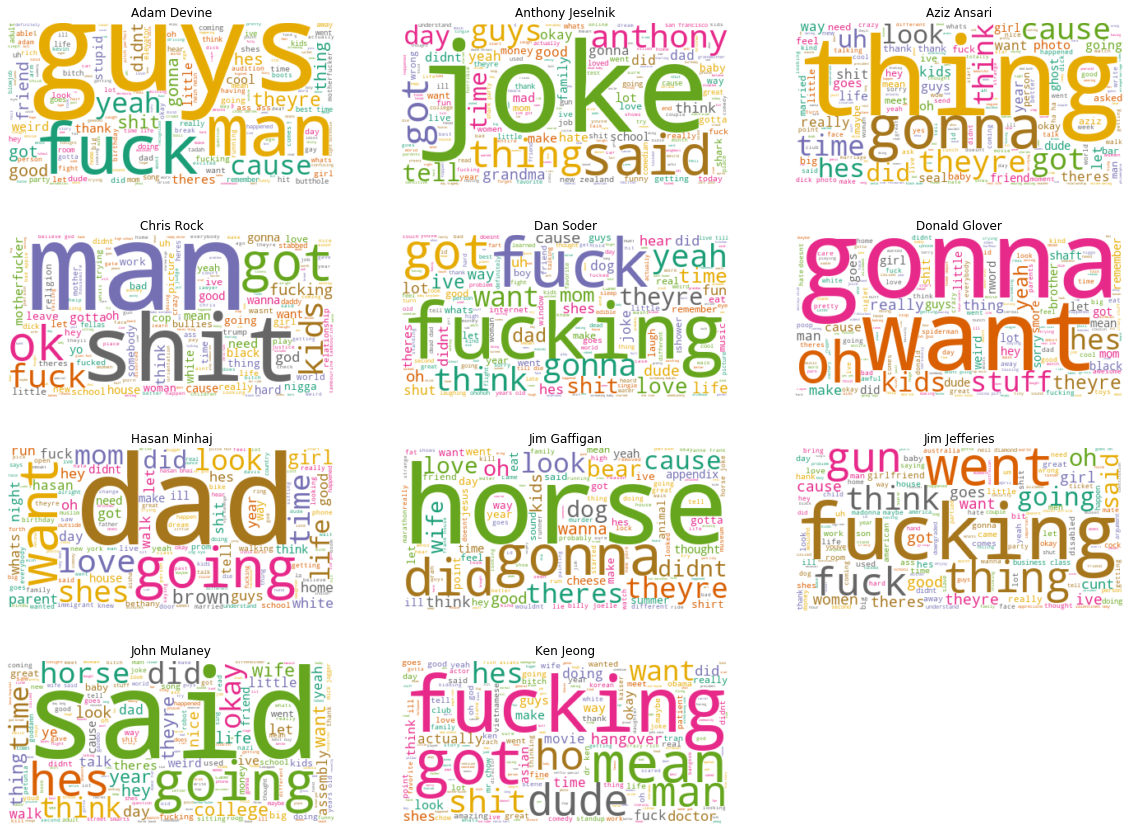

In [25]:
plt.rcParams['figure.figsize']=[20,15]

fullname = ['Adam Devine', 'Anthony Jeselnik', 'Aziz Ansari', 'Chris Rock',
       'Dan Soder', 'Donald Glover', 'Hasan Minhaj', 'Jim Gaffigan',
       'Jim Jefferies', 'John Mulaney', 'Ken Jeong']

for i , comedian in enumerate(countvectorizer_edf.columns):
  wc.generate(main_data['Transcript'][comedian])

  plt.subplot(4,3,i+1)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.title(fullname[i])

plt.show()

In [0]:
# We can see from the wordclouds that there are a lot of swearing.


In [26]:
bad_words = countvectorizer_df[['shit','fucking','fuck','motherfucker']]
data_profanity = pd.concat([bad_words['fucking'] + bad_words['fuck'] + bad_words['motherfucker'], bad_words['shit']] ,axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity


,f_word,s_word
Adam Devine,68,30
Anthony Jeselnik,19,9
Aziz Ansari,23,29
Chris Rock,114,58
Dan Soder,120,28
Donald Glover,33,19
Hasan Minhaj,28,16
Jim Gaffigan,0,0
Jim Jefferies,126,20
John Mulaney,18,8


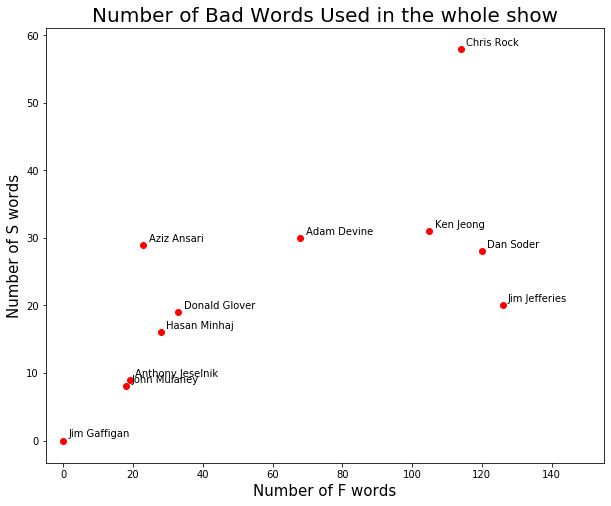

In [27]:
plt.rcParams['figure.figsize'] = [10,8]

for i,comedian in enumerate(data_profanity.index):
  x = data_profanity['f_word'].loc[comedian]
  y = data_profanity['s_word'].loc[comedian]
  plt.scatter(x,y,color='red')
  plt.text(x+1.5, y+0.5, fullname[i], fontsize=10)
  plt.xlim(-5, 155)

plt.title('Number of Bad Words Used in the whole show', fontsize=20)
plt.xlabel('Number of F words', fontsize=15)
plt.ylabel('Number of S words', fontsize=15)

plt.show()

In [0]:
#We can see that Hasan Minhaj uses both f words and s words equally , where as Chris Rock is killing the show with a lot more profanities 

In [28]:
from textblob import TextBlob

pol = lambda x : TextBlob(x).sentiment.polarity
sub = lambda x : TextBlob(x).sentiment.subjectivity

main_data['Polarity'] = main_data['Transcript'].apply(pol)
main_data['Subjectivity'] = main_data['Transcript'].apply(sub)

main_data

,Transcript,Polarity,Subjectivity
Adam Devine,hey man how are you thank you lets do this ladies and gentlemen adam devine hey hows everybody doing thank you thank you thank you all right ...,0.023910,0.561168
Anthony Jeselnik,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...,0.045507,0.565955
Aziz Ansari,ladies and gentlemen aziz ansari thank you thank you thank you thank you so much philadelphia wow thank you thank you so much wow wow this is awkw...,0.068011,0.539867
Chris Rock,ladies and gentlemen chris rock yeah please oh sit down sit yo asses down please let me get on with the show its nice to be here brooklynheres ...,0.014530,0.550391
Dan Soder,announcer ladies and gentlemen dan soder yeah yay how the hell are ya wha ah all right all right thank you all right that thats it was believ...,-0.004736,0.526296
Donald Glover,yeah yeah yeah yeah gonna talk about a lot of stuff my parents are gonna see it theyre the ones in the other car my mom hasnt yeah i want her to s...,0.004458,0.564734
Hasan Minhaj,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...,0.080180,0.464121
Jim Gaffigan,thank you thank you oh my god thank you thank you for coming out its good to be here this is what i look like its mostly my fault well its all m...,0.123884,0.507670
Jim Jefferies,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...,0.038131,0.538653
John Mulaney,welcome to radio city music hall its time any questions no walk with me good evening hi im john mulaney nice to meet you jon brion ladies and ...,0.072479,0.480509


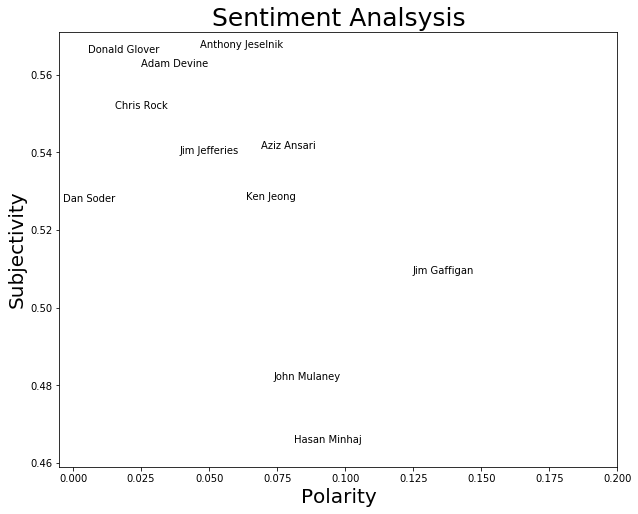

In [29]:
# We can see that Dan Soder is failrly negative in his transript while most of the other are positive.

plt.rcParams['figure.figsize'] = [10,8]

for index,comedian in enumerate(main_data.index):
  
  x = main_data['Polarity'].loc[comedian]
  y = main_data['Subjectivity'].loc[comedian]
  plt.plot(x,y,color = 'red')
  plt.text(x+.001, y+.001, fullname[index], fontsize=10)
  plt.xlim(-.005, .20)
  

plt.title('Sentiment Analsysis',fontsize=25)
plt.xlabel('Polarity',fontsize=20)
plt.ylabel('Subjectivity',fontsize=20)

plt.show()

In [0]:
# Now we will find the sentiment over time instead of looking at the overall sentiment
import math

def split(text,n=10):

  length = len(text)
  size = math.floor(length/n)
  start = np.arange(0,length,size)

  split_list =[]
  for piece in range(n):
    split_list.append(text[start[piece]:start[piece]+size])
  return split_list  

In [31]:
list_pieces = []

for t in main_data['Transcript']:
  split_1 = split(t)
  list_pieces.append(split_1)

list_pieces

[['  hey man how are you  thank you lets do this  ladies and gentlemen adam devine  hey hows everybody doing thank you thank you thank you all right yeah thank you guys so much take a seat thank you thank you oh my you guys got me jacked  im fully juiced for this thing man i am im so excited to be here thank you guys for having me im gonna have a blast tonight we all are  im so excited to be i cant get that excited though cause im an adult man now  you know you cant get that excited they will lock you up  you cant get littlekidlevel like geeked you know  remember when you were a kid and you would like open up a present and you didnt have the vocabulary to say like thank you so much mama  or however you guys talked i dont know i was kind of a weirdo i said things like yeah mama thank you so much mama you didnt have the vocabulary to say that so you just went like  you cannot make that face as an adult they will lock your ass up  you cant do like adultass things like take your kid to sch

In [32]:
len(list_pieces)

11

In [33]:
len(list_pieces[0])

10

In [34]:
popularity_main=[]

for i in list_pieces:
  popularity_piece = []
  
  for j in i:
    popularity_piece.append(TextBlob(j).sentiment.polarity)
  popularity_main.append(popularity_piece)

popularity_main


[[-0.0005544683626875342,
  -5.090039336615228e-05,
  0.018824055443773774,
  -0.030975572047000632,
  0.014135251322751338,
  0.15201122951122947,
  -0.020238095238095236,
  0.034665178571428555,
  0.0017689255189255132,
  0.07049627079747561],
 [0.1260317900256925,
  -0.06823347107438017,
  -0.044710012210012216,
  0.014602659245516405,
  0.15882883456412872,
  0.05631928181108507,
  0.0694419642857143,
  0.10123775751435324,
  -0.04366376800587332,
  0.06135590599876312],
 [0.04585166414434704,
  -0.09484595959595954,
  -0.006166602142211904,
  0.12088302922415069,
  0.11860223959713756,
  0.08710886172650878,
  0.09221125395367821,
  0.15225199026219438,
  0.032589124325966425,
  0.12561470358345353],
 [-0.011743191796383279,
  0.01880179344465059,
  -0.00924588450098654,
  -0.15426164454852984,
  -0.0008489461358313669,
  0.06680205415499528,
  0.02742228835978835,
  0.017825744214633083,
  0.06332589285714285,
  0.10132575757575753],
 [0.027102713178294588,
  -0.10647085472666871

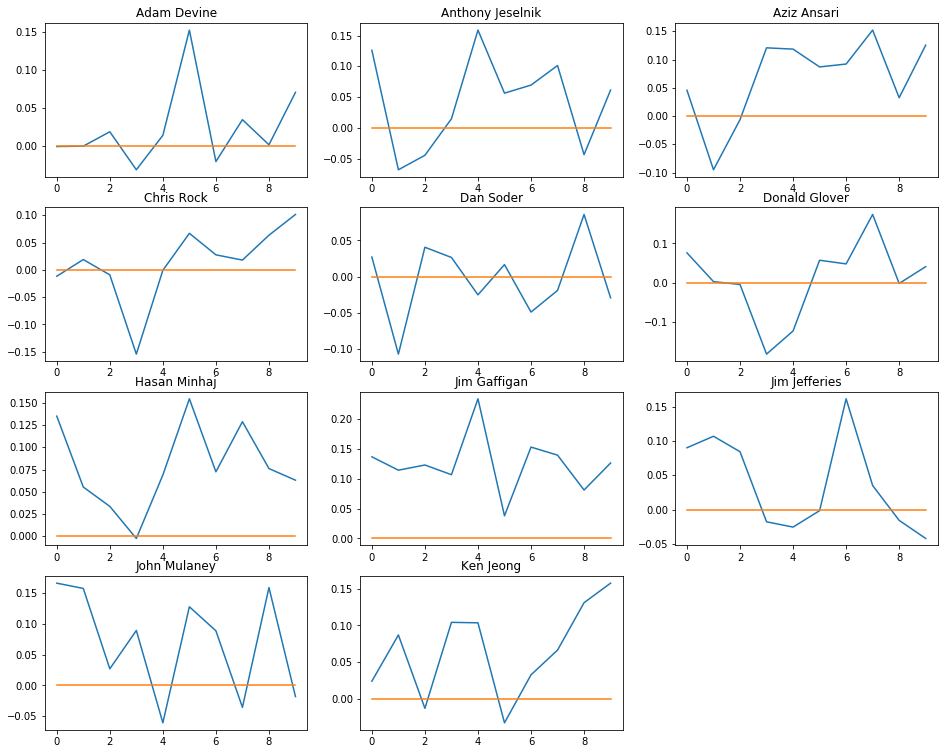

In [35]:
plt.rcParams['figure.figsize']=[16,13]

for index,comedian in enumerate(main_data.index):

  plt.subplot(4,3,index+1)
  plt.plot(popularity_main[index])
  plt.plot(np.arange(0,10), np.zeros(10))
  plt.title(fullname[index])
  #plt.ylim(ymin=-.2, ymax=.3)

plt.show()

# To do : Topic modelling and conclusion
